# **CONTEXTUALIZATION**

A supermarket company has a new internal policy to not discriminate significantly salary 
according to the location of their employees. They gathere the data from all of thei 
employees and want you to verify if they are already following the new policy.

# **Question:** Describe how can you use the supermarket data to verify if employees from different locations have significantly different salaries ? (Include here how you are going to treat the variables before feeding into the model)

Initially, I must understand, objectively, the problem that we want to solve. In
this case, we want to compare two groups and understand whether the salary
difference is statistically significant, so that we can conclude whether the new
policy is being implemented.

To do this, I will use the student t test. This test allows me to compare the
average of two groups. This specific test is for independent variables, due to
the nature of the data.

In this test, I will evaluate not only the average, because depending on the
distribution of salaries, simply comparing the average values is not enough to
reach the desired conclusion. To do this, I will have to consider, in the analysis,
the variation in salaries around the average.
The treatment I will give to the data before inserting it into the model is:
Evaluate whether the data is coherent, whether there are null values or in
non-numeric formats. Split the original data set into two, one for the interior
region and the other for the capital. Plot the salary data in both regions to get a
graphical idea of the salary distribution, apply some measures of central
tendency to gain insights.
Finally, apply the model to check whether there is a statistically significant
difference between salaries.

Before starting to code in Python, the following observation is extraordinarily
important: The question statement informs that data was collected from ALL
employees of the company, therefore, I am considering that I have the entire
population, and not just a sample. This information is extremely valuable
because my analysis will calculate the variance, and, therefore, the calculation
of the POPULATION variance, which has a different value than the sample
variance.e than the sample
variance.e than the sample
variance.

# **Question:** Implement the approach you described in python

#**1 IMPORTING THE NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import statistics as st
from scipy.stats import t
import matplotlib.pyplot as plt
import math
path = '/content/drive/MyDrive/PSS_ARTFACT/1st_Phase_-_Selective_Process_-_Data_Science_-_DataBase.xlsx'
df = pd.read_excel(path, index_col='ID')

#**2 VIEWING DATA IN TABLE FORMAT**


In [ ]:
df.head(5)

,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO_MENSAL
ID,,,,,,
1,SECUNDÁRIO,GERENTE,INTERIOR,30,1,4279.5
2,SUPERIOR,AUXILIAR,INTERIOR,32,4,4575.4
3,SECUNDÁRIO,AUXILIAR,CAPITAL,33,2,4735.6
4,SUPERIOR,GERENTE,INTERIOR,34,3,4863.1
5,SECUNDÁRIO,GERENTE,INTERIOR,36,1,5355.8


#**3 CHECKING THE TYPE OF EACH DATA TO TRANSFORM IT INTO THE CORRECT FORMAT IF NECESSARY**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1 to 82
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EDUCAÇÃO        80 non-null     object 
 1   CARGO           80 non-null     object 
 2   LOCAL           80 non-null     object 
 3   IDADE           80 non-null     int64  
 4   TEMPOCASA       80 non-null     int64  
 5   SALARIO_MENSAL  80 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ KB


**the data is in the proper format, and there are no null values. We can continue with the analysis.**

#**4 DIVIDING THE ORIGINAL DATASET INTO TWO GROUPS: INTERIOR AND CAPITAL**

In [ ]:
interior = df[df['LOCAL']=='INTERIOR']
capital = df[df['LOCAL']=='CAPITAL']

interior.head(4)

,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO_MENSAL
ID,,,,,,
1,SECUNDÁRIO,GERENTE,INTERIOR,30,1,4279.5
2,SUPERIOR,AUXILIAR,INTERIOR,32,4,4575.4
4,SUPERIOR,GERENTE,INTERIOR,34,3,4863.1
5,SECUNDÁRIO,GERENTE,INTERIOR,36,1,5355.8


In [ ]:
capital.head(4)

,EDUCAÇÃO,CARGO,LOCAL,IDADE,TEMPOCASA,SALARIO_MENSAL
ID,,,,,,
3,SECUNDÁRIO,AUXILIAR,CAPITAL,33,2,4735.6
7,SUPERIOR,AUXILIAR,CAPITAL,37,0,4434.6
10,SECUNDÁRIO,GERENTE,CAPITAL,38,8,5624.7
13,SUPERIOR,GERENTE,CAPITAL,40,3,4711.0


#**5 OBTAINING SOME METRICS FROM BOTH GROUPS TO BETTER UNDERSTAND SALARIES IN EACH LOCATION**

In [ ]:
interior.describe()

,IDADE,TEMPOCASA,SALARIO_MENSAL
count,35.000000,35.000000,35.000000
mean,45.971429,7.685714,5368.868571
std,8.716063,5.993975,718.191711
min,30.000000,0.000000,4186.600000
25%,39.500000,2.500000,4878.700000
50%,45.000000,6.000000,5254.400000
75%,50.000000,13.000000,5917.700000
max,67.000000,19.000000,6796.900000


In [ ]:
capital.describe()

,IDADE,TEMPOCASA,SALARIO_MENSAL
count,45.000000,45.000000,45.000000
mean,52.688889,13.377778,6095.542222
std,9.295214,7.490263,1300.428122
min,33.000000,0.000000,4434.600000
25%,46.000000,6.000000,5131.200000
50%,52.000000,16.000000,6051.300000
75%,60.000000,19.000000,6583.900000
max,72.000000,25.000000,12465.800000


**We note that there are more workers in the capital than in the interior, 45 and 35 respectively.**

**Average salaries by region are also different, with:**


*    **Average salary in the interior: 5368.86**

*  **Average salary in the capital: 6095.54**

**But is this difference between average salaries statistically significant? Let's find out by applying the Student's t-test.**


#**6 VISUALIZING THE DISTRIBUTION OF WAGES IN EACH REGION USING A HISTOGRAM**

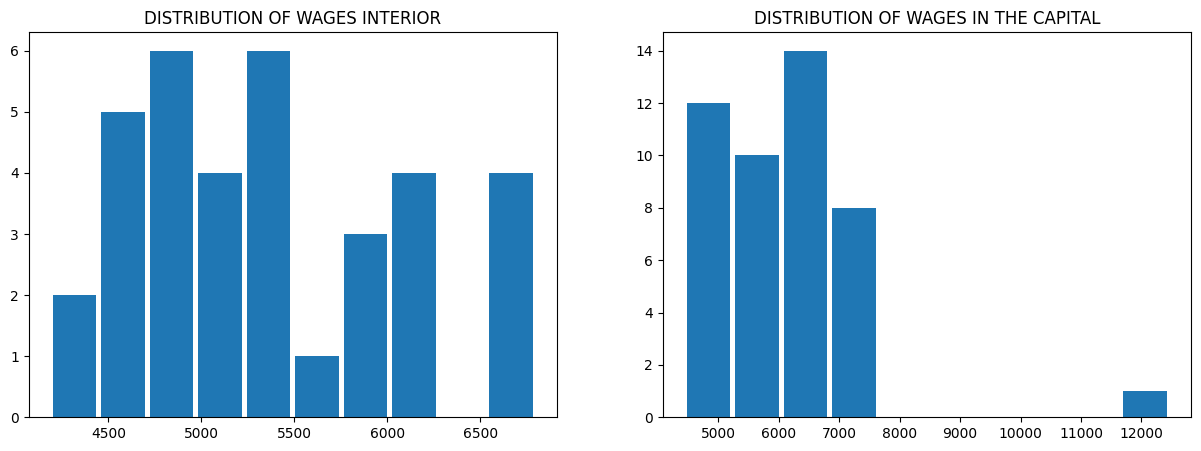

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(interior['SALARIO_MENSAL'], histtype='bar', rwidth=0.9)
ax[0].set_title('DISTRIBUTION OF WAGES INTERIOR')

ax[1].hist(capital['SALARIO_MENSAL'],histtype='bar', rwidth=0.9)
ax[1].set_title('DISTRIBUTION OF WAGES IN THE CAPITAL');

**When viewing salary distributions by region, it is possible to notice that there is a salary in CAPITAL that is well above the second highest. And this salary is certainly having a negative impact on the average value.**

#**7 APPLYING THE STUDENT T-TEST**

**Step 1: Determine the variance**

**The POPULATION variance is given by:**
$$S^2 = \frac{\sum_{}X^2{}}{N}-\bar{X}^2$$


*   With $\bar{X}$ being the average salary
*   $X$ the value of each salary
*   $N$ Population size for each group
*   $S^2$ the variance


**Thus, applying the formula for variance in salaries for both groups, we obtain the following results:**



In [ ]:
variancia_INTERIOR = st.pvariance(interior['SALARIO_MENSAL'])
variancia_CAPITAL = st.pvariance(capital['SALARIO_MENSAL'])

print(f'The population variance of wages in the interior region is: {variancia_INTERIOR} ')
print('\n')
print(f'The population variance of wages in the capital is: {variancia_CAPITAL} ')


The population variance of wages in the interior region is: 501062.2095836734 


The population variance of wages in the capital is: 1653533.0051061725 


**TO CONTINUE THE T TEST WE NEED TO MAKE A COMBINED VARIANCE, WHICH IS GIVEN BY THE FOLLOWING FORMULA:**

$$S_{\bar{X}_1-\bar{X}_2} = \sqrt{(\frac{N_1S^2_1+N_2S^2_2}{N_1+N_2-2})(\frac{N_1+N_2}{N_1N_2})}$$

where,

*   $N_1$ total staff in region $1$

*   $N_2$ total staff in region $2$

*   $S^2_2$ variance of group $2$

*   $S^2_1$ variance of group $1$



In [ ]:
N_1 = len(interior['SALARIO_MENSAL'])
N_2 = len(capital['SALARIO_MENSAL'])

S_1 = st.pvariance(interior['SALARIO_MENSAL'])
S_2 = st.pvariance(capital['SALARIO_MENSAL'])

S_combined = math.sqrt(((N_1*S_1 + N_2*S_2)/(N_1+N_2-2))*((N_1+N_2)/(N_1*N_2)))
print(f'The value of the Combined Variance is: {S_combined}')

The value of the Combined Variance is: 244.6945053283038


**NOW, WE NEED TO DETERMINE THE VALUE OF $t$, WHICH IS GIVEN BY:**

$$t = \frac{\bar{X}_1 - \bar{X}_2}{S_{\bar{X}_1-\bar{X}_2}}$$


In [ ]:
X_1 = interior['SALARIO_MENSAL'].mean()
X_2 = capital['SALARIO_MENSAL'].mean()

t_teste_observado = (X_1 - X_2) / (S_combined)
print(f'The value of t observed is: {t_teste_observado}')

The value of t observed is: -2.969717893005732


**TO CONTINUE WE NEED TO DETERMINE THE CRITICAL VALUE IN A TABLE, AND TO DETERMINE THIS CRITICAL VALUE WE NEED TO DETERMINE THE DEGREES OF FREEDOM $gl$, WHICH ARE GIVEN BY:**

$$gl = N_1 + N_2 - 2$$

In [ ]:
gl = N_1 + N_2 - 2
print(f'The value of the degrees of freedom gl is: {gl}')

The value of the degrees of freedom gl is: 78


**NOW WE NEED TO DEFINE A SIGNIFICANCE FOR OUR DECISION MAKING. FOR THIS WE WILL CONSIDER A SIGNIFICANCE OF 0.05.**

**with a significance of 0.05 we have 95% certainty of our final conclusion.**

**NOW LETS CALCULATE THE CRITICAL T. THIS CRITICAL T TELLS ME THE MAXIMUM AND MINIMUM VALUE THAT THE OBSERVED T VALUE CAN BE. IF THE CRITICAL T VALUE ESTABLISHES A RANGE OF VALUES, AND THE OBSERVED T IS OUTSIDE THIS RANGE, THE IMPLICATION IS THAT SALARIES ARE STATISTICALLY DIFFERENT IN EACH REGION.**

**The value of critical t is given in several literatures by a table.**

**However, we do not need this table if we know what is behind the values ​​in the table. The table summarizes several values, associated with $gl$ and the desired significance.**

**The values ​​present in the table are results of defined integrals, which establish a relationship between the area below a normal curve and a probability.**

**In order not to prolong the discussion too much, I invite colleagues to sit down and discuss this very interesting topic, but which, due to its complex nature, is beyond the scope of this work.**

**DETERMINING THE T-CRITICAL VALUE.**

In [ ]:
p = 0.95
alpha = 1 - p
pr = 1 - alpha/2

t_critico = t.ppf(pr, gl)
print(f'The critical t value is: {t_critico}')


The critical t value is: 1.990847068555052


**CARRYING OUT THE ANALYSIS AND INTERPRETATION OF T, T-CRITICAL VALUES.**

**For this analysis we will create a graph, as the dispositions of T and T-critical values ​​become more didactic.**

**See the image below that illustrates the range of values ​​delimited by the critical t, which goes from -1.9908 to 1.9908.**

**Note that the observed t value is outside this range determined by the critical t.**


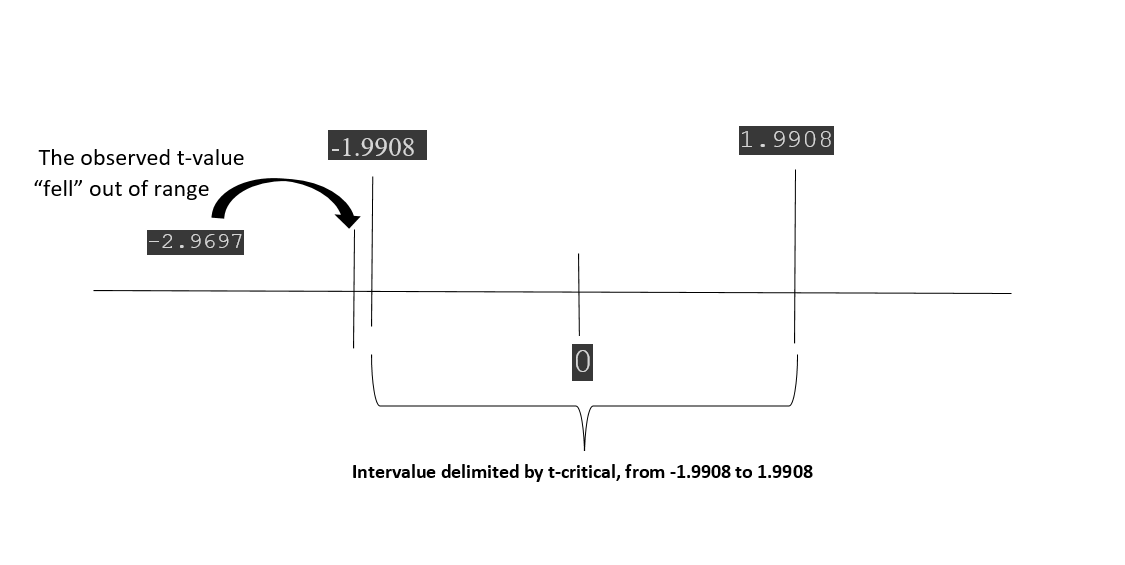

#**8 CONCLUSION**

**Given the result of the student's t test, it can be said, with 95% certainty, that there is a significant difference between salaries in each region.**  



#9 **FINAL CONSIDERATIONS**

**In this analysis, important parameters were not considered, such as: Length of work at the company, level of education and position.**




